In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
drive_path = '/content/drive/MyDrive/general_assembly/code/capstone/arabic_characters/'

In [13]:
import pickle

import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.regularizers import l2

#from tensorflow.keras.optimizers import SGD

np.random.seed(42)

In [4]:
with open(drive_path + 'arabcharsrgb.pkl', 'rb') as f:
    ac_data = pickle.load(f)

In [5]:
train_imgs = ac_data[0].copy()
test_imgs = ac_data[1].copy()
train_labels = ac_data[2].copy()
test_labels = ac_data[3].copy()
X_train = ac_data[4].copy()
X_test = ac_data[5].copy()
y_train = ac_data[6].copy()
y_test = ac_data[7].copy()
class_dict = ac_data[8].copy()

## CNN Model #1
This is the model proposed in the paper outlining the data set by the people who collected the data [(source)](https://www.researchgate.net/publication/313891953_Arabic_Handwritten_Characters_Recognition_using_Convolutional_Neural_Network)

In [17]:
# construct network
model = Sequential()

# Convolutional and Max Pooling - layers 1 & 2
model.add(Conv2D(80, (5, 5), activation='relu', input_shape=(32, 32, 3), kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D((2, 2)))

# Convolutional and Max Pooling - layers 3 & 4
model.add(Conv2D(64, (5, 5), activation='relu', kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D((2, 2)))

# classification - layers 5 & 6
model.add(Flatten())
model.add(Dense(1024, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(28, activation='softmax'))

# compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=256, epochs=30)

Epoch 1/30
53/53 [==============================] - 48s 896ms/step - loss: 6.7789 - accuracy: 0.4143 - val_loss: 2.7175 - val_accuracy: 0.6887
Epoch 2/30
53/53 [==============================] - 47s 893ms/step - loss: 2.0830 - accuracy: 0.7382 - val_loss: 1.6379 - val_accuracy: 0.7798
Epoch 3/30
53/53 [==============================] - 47s 894ms/step - loss: 1.4155 - accuracy: 0.7993 - val_loss: 1.2773 - val_accuracy: 0.8071
Epoch 4/30
53/53 [==============================] - 47s 892ms/step - loss: 1.1631 - accuracy: 0.8243 - val_loss: 1.1108 - val_accuracy: 0.8301
Epoch 5/30
53/53 [==============================] - 47s 891ms/step - loss: 1.0289 - accuracy: 0.8430 - val_loss: 1.0256 - val_accuracy: 0.8333
Epoch 6/30
53/53 [==============================] - 47s 894ms/step - loss: 0.9469 - accuracy: 0.8554 - val_loss: 0.9886 - val_accuracy: 0.8336
Epoch 7/30
53/53 [==============================] - 47s 893ms/step - loss: 0.9078 - accuracy: 0.8563 - val_loss: 0.9566 - val_accuracy: 0.8375

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 28)        2128      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 28)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 10)        7010      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 10)          0         
_________________________________________________________________
flatten (Flatten)            (None, 250)               0         
_________________________________________________________________
dense (Dense)                (None, 1024)              257024    
_________________________________________________________________
dense_1 (Dense)              (None, 28)                2

In [10]:
def plot_training(model_history=history):
    plt.figure(figsize=(8,10))

    plt.subplot(2,1,1)
    plt.title('Model Loss', fontsize=16)
    plt.xlabel('Number of Epochs', fontsize=12)
    plt.plot(model_history.history['loss'], label='Train Loss')
    plt.plot(model_history.history['val_loss'], label='Val Loss')
    plt.legend()

    plt.subplot(2,1,2)
    plt.title('Model Accuracy', fontsize=16)
    plt.xlabel('Number of Epochs', fontsize=12)
    plt.plot(model_history.history['accuracy'], label='Train Accuracy')
    plt.plot(model_history.history['val_accuracy'], label='Val Accuracy')
    plt.legend()

    plt.subplots_adjust(hspace=0.5) 
    plt.show()

    return

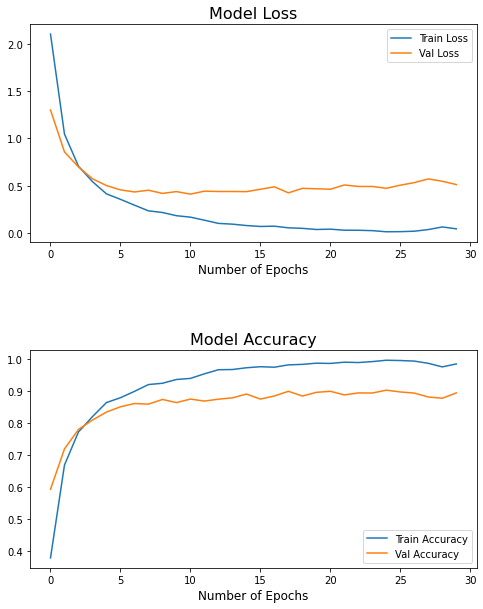

In [11]:
plot_training()

In [12]:
model.evaluate(X_test, y_test)

105/105 [==============================] - 2s 13ms/step - loss: 0.5129 - accuracy: 0.8943


[0.5129294395446777, 0.894345223903656]

In [19]:
model.save(drive_path + 'models/cnn_1.h5')

## Model Performance
The model outlined in the paper makes a noticeable improvement to the baseline. The accuracy went up nearly 8 points to 89.43% and the loss function dropped nearly 16 points to 0.5129.